In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from pmdarima.arima import auto_arima

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [25]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [26]:
rootPathSourceData = './Data/smart-meters-in-london/'

In [27]:
block_90_df = pd.read_csv(rootPathSourceData + "halfhourly_dataset/halfhourly_dataset/block_90.csv")

In [28]:
block_90_df["tstp"]

0          2011-11-30 10:00:00.0000000
1          2011-11-30 10:30:00.0000000
2          2011-11-30 11:30:00.0000000
3          2011-11-30 12:00:00.0000000
4          2011-11-30 12:30:00.0000000
                      ...             
1441031    2014-02-27 22:00:00.0000000
1441032    2014-02-27 22:30:00.0000000
1441033    2014-02-27 23:00:00.0000000
1441034    2014-02-27 23:30:00.0000000
1441035    2014-02-28 00:00:00.0000000
Name: tstp, Length: 1441036, dtype: object

In [29]:
block_90_df

,LCLid,tstp,energy(kWh/hh)
0,MAC000213,2011-11-30 10:00:00.0000000,0
1,MAC000213,2011-11-30 10:30:00.0000000,0
2,MAC000213,2011-11-30 11:30:00.0000000,0.066
3,MAC000213,2011-11-30 12:00:00.0000000,0.047
4,MAC000213,2011-11-30 12:30:00.0000000,0.053
...,...,...,...
1441031,MAC005520,2014-02-27 22:00:00.0000000,0.157
1441032,MAC005520,2014-02-27 22:30:00.0000000,0.192
1441033,MAC005520,2014-02-27 23:00:00.0000000,0.17
1441034,MAC005520,2014-02-27 23:30:00.0000000,0.129


In [30]:
block_90_df = block_90_df.set_index("tstp")
block_90_df.index = block_90_df.index.astype('datetime64[ns]')

In [31]:
block_90_df

,LCLid,energy(kWh/hh)
tstp,,
2011-11-30 10:00:00,MAC000213,0
2011-11-30 10:30:00,MAC000213,0
2011-11-30 11:30:00,MAC000213,0.066
2011-11-30 12:00:00,MAC000213,0.047
2011-11-30 12:30:00,MAC000213,0.053
...,...,...
2014-02-27 22:00:00,MAC005520,0.157
2014-02-27 22:30:00,MAC005520,0.192
2014-02-27 23:00:00,MAC005520,0.17


In [32]:
block_90_df = block_90_df[block_90_df["energy(kWh/hh)"] != "Null"]
block_90_df["energy(kWh/hh)"] = block_90_df["energy(kWh/hh)"].astype("float64")

/Users/hansremy/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
block_90_df = block_90_df[block_90_df["LCLid"] == "MAC000213" ]

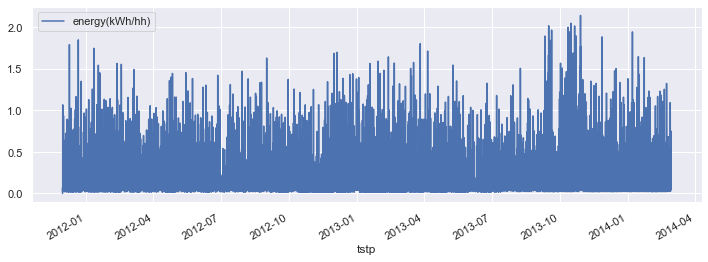

In [34]:
block_90_df.plot(y="energy(kWh/hh)", figsize=(12, 4))

In [35]:
train_size = int(0.8 * len(block_90_df))
X_train, X_test = block_90_df[:train_size].index, block_90_df[train_size:].index
y_train, y_test = block_90_df[:train_size]["energy(kWh/hh)"].values, block_90_df[train_size:]["energy(kWh/hh)"].values

In [36]:
train_df = pd.concat([pd.Series(X_train), pd.Series(y_train)], axis=1, keys=["ds", "y"])
test_df = pd.concat([pd.Series(X_test), pd.Series([0]*len(y_test))], axis=1, keys=["ds", "y"])
answer_df = pd.concat([pd.Series(X_test), pd.Series(y_test)], axis=1, keys=["ds", "y"])

In [37]:
X_train

DatetimeIndex(['2011-11-30 10:00:00', '2011-11-30 10:30:00',
               '2011-11-30 11:30:00', '2011-11-30 12:00:00',
               '2011-11-30 12:30:00', '2011-11-30 13:00:00',
               '2011-11-30 13:30:00', '2011-11-30 14:00:00',
               '2011-11-30 14:30:00', '2011-11-30 15:00:00',
               ...
               '2013-09-16 17:00:00', '2013-09-16 17:30:00',
               '2013-09-16 18:00:00', '2013-09-16 18:30:00',
               '2013-09-16 19:00:00', '2013-09-16 19:30:00',
               '2013-09-16 20:00:00', '2013-09-16 20:30:00',
               '2013-09-16 21:00:00', '2013-09-16 21:30:00'],
              dtype='datetime64[ns]', name='tstp', length=31506, freq=None)

In [38]:
train_df

,ds,y
0,2011-11-30 10:00:00,0.000
1,2011-11-30 10:30:00,0.000
2,2011-11-30 11:30:00,0.066
3,2011-11-30 12:00:00,0.047
4,2011-11-30 12:30:00,0.053
...,...,...
31501,2013-09-16 19:30:00,0.542
31502,2013-09-16 20:00:00,0.510
31503,2013-09-16 20:30:00,0.510
31504,2013-09-16 21:00:00,0.110


In [39]:
model = Prophet()
model.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [40]:
forecast = model.predict(test_df)

In [41]:
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-09-16 22:00:00,0.143461,-0.019234,0.355269,0.143461,0.143461,0.016999,0.016999,0.016999,0.018684,0.018684,0.018684,-0.001686,-0.001686,-0.001686,0.0,0.0,0.0,0.160460
1,2013-09-16 22:30:00,0.143468,-0.035971,0.314207,0.143468,0.143468,-0.002089,-0.002089,-0.002089,-0.000344,-0.000344,-0.000344,-0.001745,-0.001745,-0.001745,0.0,0.0,0.0,0.141379
2,2013-09-16 23:00:00,0.143475,-0.050151,0.291162,0.143475,0.143475,-0.025167,-0.025167,-0.025167,-0.023384,-0.023384,-0.023384,-0.001783,-0.001783,-0.001783,0.0,0.0,0.0,0.118308
3,2013-09-16 23:30:00,0.143483,-0.088610,0.276505,0.143483,0.143483,-0.049029,-0.049029,-0.049029,-0.047227,-0.047227,-0.047227,-0.001802,-0.001802,-0.001802,0.0,0.0,0.0,0.094454
4,2013-09-17 00:00:00,0.143490,-0.113362,0.254067,0.143490,0.143490,-0.070321,-0.070321,-0.070321,-0.068519,-0.068519,-0.068519,-0.001802,-0.001802,-0.001802,0.0,0.0,0.0,0.073169


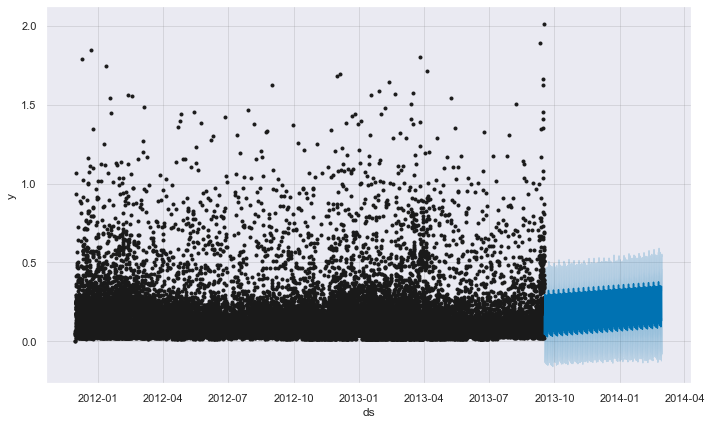

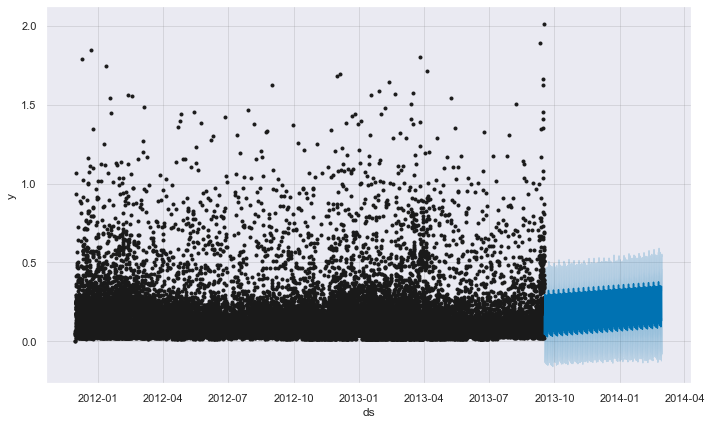

In [42]:
model.plot(forecast)

model.plot(forecast).savefig('./Graphs/mvpforcast.png');

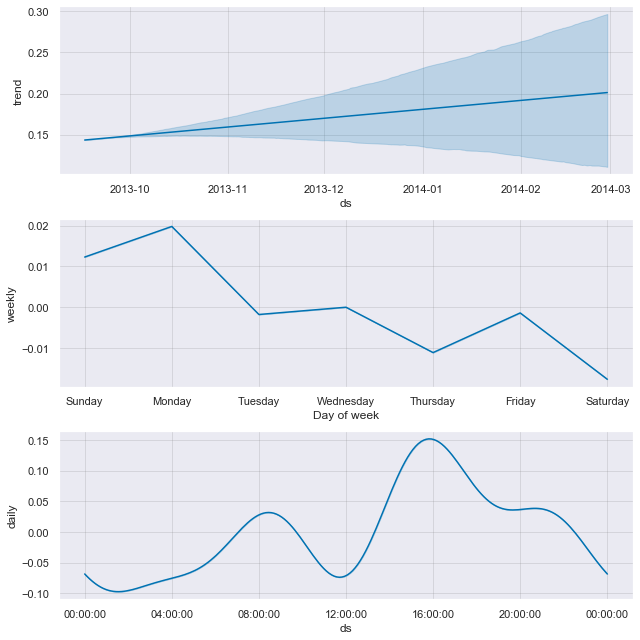

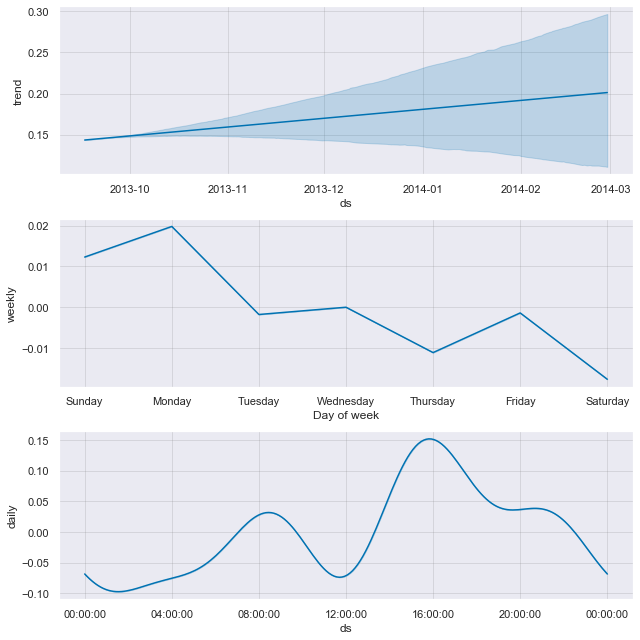

In [43]:
model.plot_components(forecast)
model.plot_components(forecast).savefig('./Graphs/mvpcompforcast.png');

In [44]:
df_cv = cross_validation(model, horizon="60 days")
df_cv.head()

INFO:fbprophet:Making 14 forecasts with cutoffs between 2012-06-23 21:30:00 and 2013-07-18 21:30:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-06-23 22:00:00,0.169043,-0.013398,0.341788,0.085,2012-06-23 21:30:00
1,2012-06-23 22:30:00,0.151597,-0.032692,0.311347,0.044,2012-06-23 21:30:00
2,2012-06-23 23:00:00,0.129059,-0.054209,0.305965,0.016,2012-06-23 21:30:00
3,2012-06-23 23:30:00,0.103818,-0.072723,0.289557,0.059,2012-06-23 21:30:00
4,2012-06-24 00:00:00,0.078939,-0.097386,0.252772,0.049,2012-06-23 21:30:00


In [45]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days 00:30:00,0.019673,0.140260,0.079322,0.747323,0.535137,0.914165
1,6 days 01:00:00,0.019677,0.140276,0.079333,0.747426,0.535082,0.913917
2,6 days 01:30:00,0.019677,0.140275,0.079336,0.745978,0.534621,0.913917
3,6 days 02:00:00,0.019672,0.140257,0.079298,0.744834,0.532307,0.913917
4,6 days 02:30:00,0.019672,0.140259,0.079298,0.744952,0.531966,0.913917
...,...,...,...,...,...,...,...
2587,59 days 22:00:00,0.026808,0.163732,0.093621,0.891890,0.613511,0.880675
2588,59 days 22:30:00,0.026816,0.163757,0.093643,0.892206,0.613558,0.880675
2589,59 days 23:00:00,0.026865,0.163906,0.093783,0.892769,0.613823,0.880427
2590,59 days 23:30:00,0.026896,0.164001,0.093924,0.893137,0.614426,0.880179


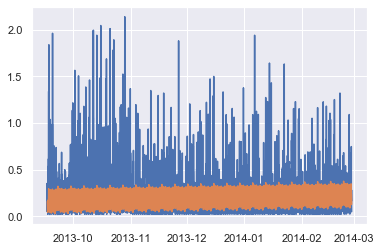

In [46]:
plt.plot(answer_df["ds"], answer_df["y"])
plt.plot(forecast["ds"], forecast["yhat"])

In [47]:
# We have to add week and month seasonality
model = Prophet(weekly_seasonality=True)
model.add_seasonality(name="monthly", period=30.5, fourier_order=5)
model.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [48]:
forecast = model.predict(test_df)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-09-16 22:00:00,0.143432,0.004992,0.350749,0.143432,0.143432,0.019993,0.019993,0.019993,0.018686,...,0.002984,0.002984,0.002984,-0.001677,-0.001677,-0.001677,0.0,0.0,0.0,0.163425
1,2013-09-16 22:30:00,0.143439,-0.032047,0.326054,0.143439,0.143439,0.000848,0.000848,0.000848,-0.000343,...,0.002927,0.002927,0.002927,-0.001736,-0.001736,-0.001736,0.0,0.0,0.0,0.144287
2,2013-09-16 23:00:00,0.143446,-0.049897,0.288343,0.143446,0.143446,-0.022289,-0.022289,-0.022289,-0.023384,...,0.002870,0.002870,0.002870,-0.001775,-0.001775,-0.001775,0.0,0.0,0.0,0.121157
3,2013-09-16 23:30:00,0.143454,-0.087202,0.270124,0.143454,0.143454,-0.046209,-0.046209,-0.046209,-0.047227,...,0.002813,0.002813,0.002813,-0.001795,-0.001795,-0.001795,0.0,0.0,0.0,0.097245
4,2013-09-17 00:00:00,0.143461,-0.101684,0.260406,0.143461,0.143461,-0.067560,-0.067560,-0.067560,-0.068521,...,0.002756,0.002756,0.002756,-0.001795,-0.001795,-0.001795,0.0,0.0,0.0,0.075901


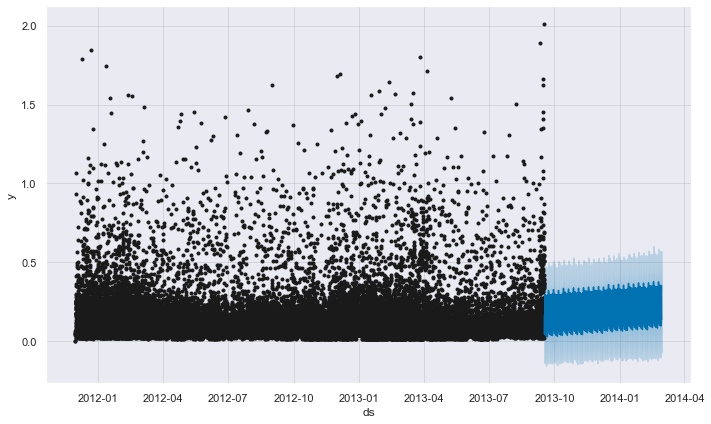

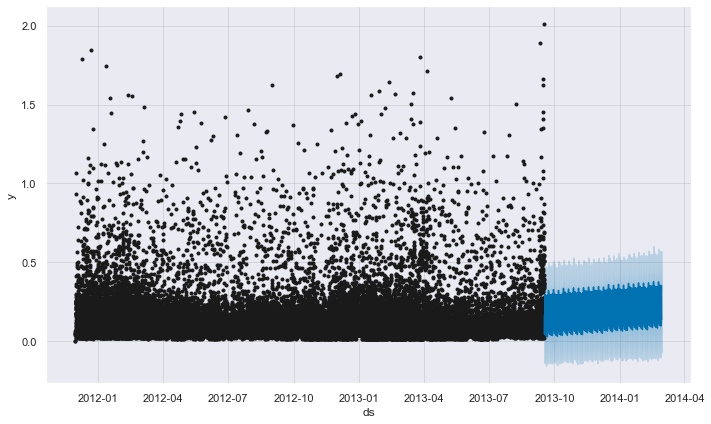

In [49]:
model.plot(forecast)

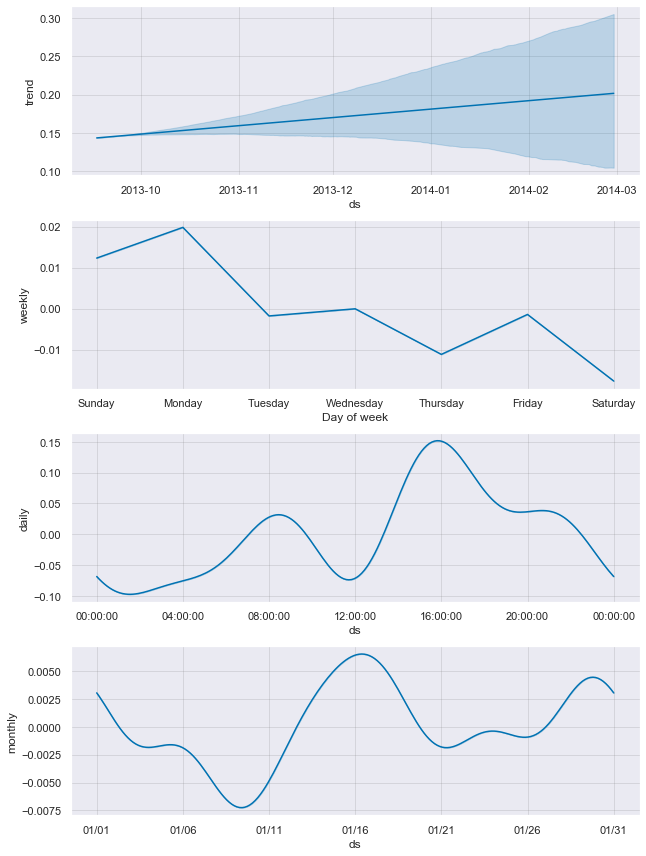

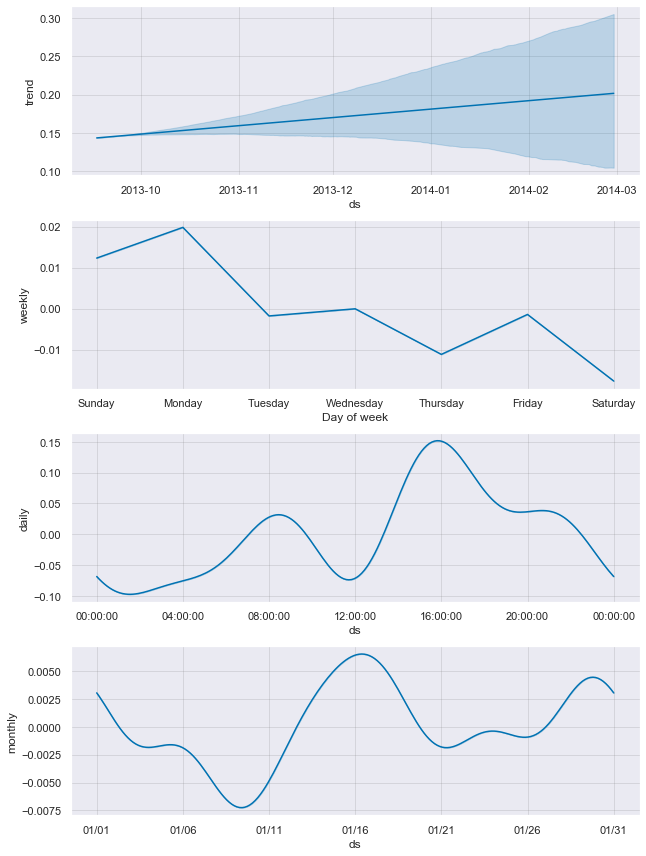

In [50]:
model.plot_components(forecast)
